## Load data

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

folder1 = "real_train_real_test/"
folder2 = "real_train_sim_test/"

# folder1 = "sim_train_sim_test/"
# folder2 = "sim_train_real_test/"

# Read CSV files from the directory
csv_path1 = 'runs/test/' + folder1
csv_path2 = 'runs/test/' + folder2

results = 'test_results.csv'
summary = 'test_summary.csv'
save_path = '/home/ondra/BC/'


df_results1 = pd.read_csv(csv_path1 + results)  # Replace 'data.csv' with the actual file name
# print(df_results1.head())

df_summary1 = pd.read_csv(csv_path1 + summary)  # Replace 'summary.csv' with the actual file name
print(df_summary1.head())

df_results2 = pd.read_csv(csv_path2 + results)  # Replace 'data.csv' with the actual file name
# print(df_results1.head())
df_summary2 = pd.read_csv(csv_path2 + summary)  # Replace 'summary.csv' with the actual file name
print(df_summary2.head())

   mean_corner_err_2d  pixel_threshold  vertex_threshold      acc2d     acc3d  \
0            2.784074                5              0.02  92.411143  6.916426   

   acc10cm10deg     nts  trans_error  angle_error   mean_iou  
0     52.689721  2082.0     0.738943     2.790804  86.380498  
   mean_corner_err_2d  pixel_threshold  vertex_threshold     acc2d  acc3d  \
0           206.48863                5              0.02  0.629723    0.0   

   acc10cm10deg     nts  trans_error  angle_error   mean_iou  
0           0.0  2382.0     5.517528   113.104596  14.685738  


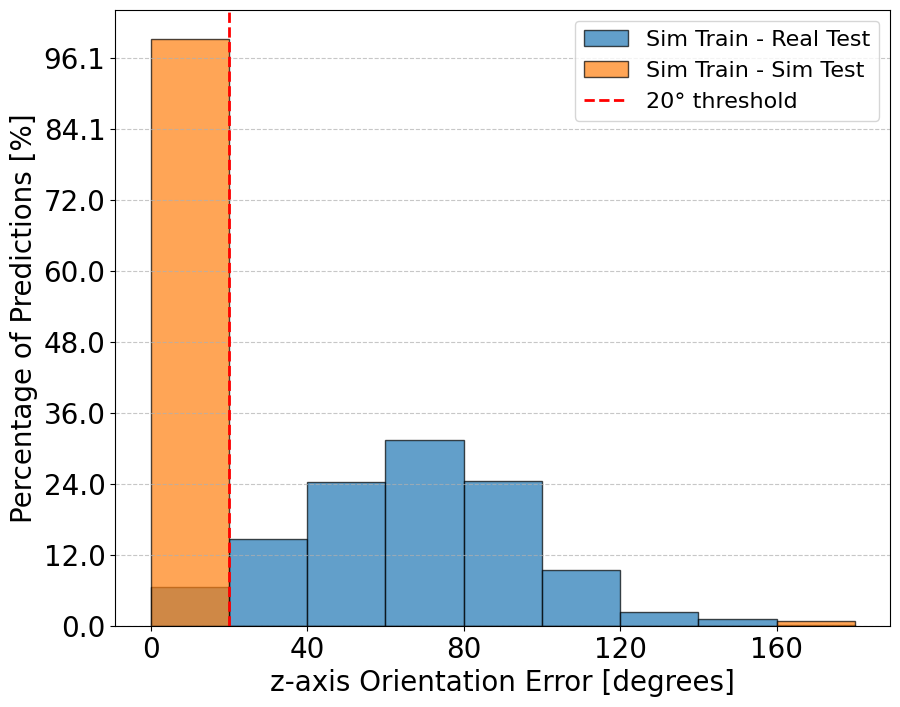

Percentage of predictions under 20 degrees of error: 6.53%


In [42]:
fig, ax = plt.subplots()

# Define bins for the histogram
bins = range(0, int(df_results1['z_axis_angle_error'].max()) + 20, 20)

# Plot the histogram
counts2, _, _ = ax.hist(df_results2['z_axis_angle_error'], bins=bins, edgecolor='black', alpha=0.7, label='Sim Train - Real Test')

counts, _, _ = ax.hist(df_results1['z_axis_angle_error'], bins=bins, edgecolor='black', alpha=0.7, label='Sim Train - Sim Test')

ax.set_xlabel('z-axis Orientation Error [degrees]', fontsize=20)
ax.set_ylabel('Percentage of Predictions [%]', fontsize=20)
ax.set_xticks(bins)
# Increase the font size of the numbers on the axis
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xticks(list(bins)[::2])

total_predictions = len(df_results1)

# Draw a red vertical line at 20 degrees
ax.axvline(x=20, color='red', linestyle='--', linewidth=2, label='20° threshold')

# Add legend for the threshold line
ax.legend(fontsize=16)

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{(y / total_predictions) * 100:.1f}'))
ax.grid(axis='y', linestyle='--', alpha=0.7)

fig.set_size_inches(10, 8)  # Set the figure size to make the plot wider

# Save the plot as a PDF
fig.savefig(save_path + 'z_axis_orientation_error_distribution2.pdf', format='pdf')
plt.show()

num_below_20 = (df_results2['z_axis_angle_error'] < 20).sum()
percent_below_20 = (num_below_20 / total_predictions) * 100
print(f'Percentage of predictions under 20 degrees of error: {percent_below_20:.2f}%')
